# Proyek Analisis Data: Bike Sharing
- **Nama:** MUHAMAD FAHRUDIN
- **Email:** mufa290300@gmail.com
- **ID Dicoding:** mufa_290300

## Menentukan Pertanyaan Bisnis

- Pada Musim apakah penyewaan sepeda paling banyak?
- Pada Jam berapa penyewaan sepeda paling banyak dan paling sedikit ?
- Berapa banyak perbandingan orang yang registered dan casual ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat Tabel day.csv dan Tabel Hour.csv

In [2]:
#Memuat Tabel day.csv
day_df = pd.read_csv('day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
hour_df = pd.read_csv('hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Berdasarkan tabel diatas dapat dilihat bahwa dataset day.csv memiliki jumlah baris sebanyak 731 dan 16 kolom.
- Dan untuk Tabel hour.csv memiliki jumlah baris sebanyak 17379 dan 17 kolom.

### Assessing Data

#### Menilai data dari day.csv dan hour.csv

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB




*   Berdasarkan info dari tabel day.csv tidak ada data yang hilang semuanya telah lengkap tetapi ada kolom dteday terdeksi sebagai object seharusnya bertipe datetime.



In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB




*   Dan tabel hour.csv pun datanya lengkap hanya saja sama bahwa kolom dteday terdeteksi sebagai object seharusnya datetime.



In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


 *   Berdasarkan tabel diatas tidak ada data yang aneh atau oulier semua aman dari min sampai dengan max.

*    Ada beberapa data yang seharusnya kategorikal menjadi numerik.
*    Dan Saya akan merubah nama nama kolom supaya dapat dibaca dengan mudah.

In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


*   Dan tabel hour.cvs pun juga sama aman tidak ada data oulier
*   Ada beberapa data yang seharusnya kategorikal menjadi numerik.
*   Dan Saya akan merubah nama nama kolom supaya dapat dibaca dengan mudah.



In [8]:
#Mengecek data yang hilang di tabel day_df
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0




*   Dapat dibuktikan bahwa benar tidak ada missing value dalam tabel day_df



In [9]:
# Mengecek data yang hilang di hour_df
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0




*   Begitupun Dengan tabel hour_df tidak ada missing value.


In [10]:
#Memeriksa data yang duplikat
print("Jumlah data yang duplikat: ", day_df.duplicated().sum())
print("Jumlah data yang duplikat: ", hour_df.duplicated().sum())

Jumlah data yang duplikat:  0
Jumlah data yang duplikat:  0




*   Tidak ada data yang duplikat di dataframe day_df maupun hour_df.


### Cleaning Data

#### Mengubah Tipe data kolom dteday yang asalnya object menjadi datetime


In [11]:
# Mengubah tipe data kolom dteday yang asalnya object menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

#### Mengubah Tipe data int menjadi kategori pada kolom kolom

In [12]:
# Mengubah Tipe data int menjadi data kategori pada kolom - kolom
columns = ["season", "mnth", "holiday", "weekday", "weathersit"]
for column in columns:
    day_df[column] = day_df[column].astype("category")
    hour_df[column] = hour_df[column].astype("category")

#### Mengubah kolom kolom agar mudah dibaca di data day_df

In [13]:
# Mengubah nama - nama kolom agar mudah dibaca di data day_df.
day_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "cnt": "Total_count"
}, inplace=True)

#### Mengubah isi dari kolom kolom

In [14]:
# Mengubah nama - nama kolom agar mudah dibaca di data hour_df
hour_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "cnt": "Total_count"
}, inplace=True)

In [15]:
# Mengubah isi kolom berdasarkan info yang didapat dari sumber dataset.
day_df["season"] = day_df["season"].map({
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})

In [16]:
# data kolom season di data hour_df
hour_df["season"] = hour_df["season"].map({
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})

In [17]:
day_df["month"] = day_df["month"].map ({
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
})

In [18]:
# Mengubah kolom month di hour_df
hour_df["month"] = hour_df["month"].map ({
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
})

In [19]:
#Mengubah isi di kolom weekday di data day_df dan hour_df
day_df["weekday"] = day_df["weekday"].map({
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
})
hour_df["weekday"] = hour_df["weekday"].map({
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
})

In [20]:
# Mengubah isi kolom weathersit
day_df["weathersit"] = day_df["weathersit"].map({
    1: "Clear",
    2: "Misty",
    3: "Light Rainsnow",
    4: "Heavy Rainsnow"
})
hour_df["weathersit"] = hour_df["weathersit"].map({
    1: "Clear",
    2: "Misty",
    3: "Light Rainsnow",
    4: "Heavy Rainsnow"
})

In [21]:
# Mengubah isi data year
day_df["year"] = day_df["year"].map({
    0: 2011,
    1: 2012
})

**Insight:**
- Mengubah tipe kolom dteday
- Mengubah nama nama kolom supaya mudah dibaca
- Mengubah isi kolom berdasarkan sumber dataset

## Exploratory Data Analysis (EDA)

### Explore ...

#### Melihat Jumlah penyewaan di tiap tiap musim

In [22]:
# Melihat jumlah penyewaan tiap tiap musim
day_df.groupby("season")["Total_count"].sum().sort_values(ascending=False).reset_index()


<ipython-input-22-a659b230ec0c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("season")["Total_count"].sum().sort_values(ascending=False).reset_index()


,season,Total_count
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


#### Melihat Jumlah penyewaan berdasarkan jam

In [23]:
# Melihat jumlah penyewaan berdasarkan jam
hour_df.groupby("hour")["Total_count"].sum().sort_values(ascending=False).reset_index()

,hour,Total_count
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


#### Melihat Jumlah penyewaan tiap tahun berdasarkan registered dan casual

In [24]:
#melihat jumlah penyewaan tiap tahun berdasarkan registered dan casual
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


**Insight:**
- Berdasarkan data data diatas dapat diketahui bahwa penyewa terbannyak ada pada musim fall.Penyewa terbanyak pada jam 17.00 dan paling rendah pada jam 4.00.Dan terakhir data yang ter registered di 2011 itu 995851 dan yang casual itu 247252 pada tahun 2012 ter registered 1676811 dan casula 372765 melihat data tersebut sangat jauh sekali pengguna ter registered dan casual.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apakah penyewaan paling terbanyak ?

<ipython-input-25-f3ec866c1d33>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


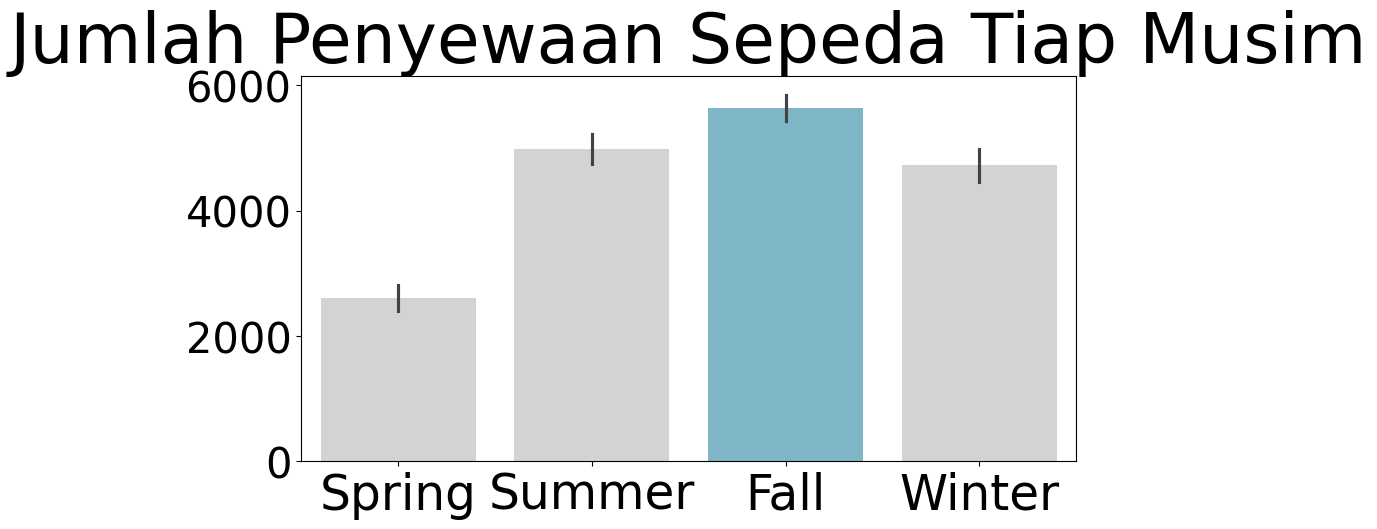

In [25]:
## Pada musim apakah penyewaan paling terbanyak?
# mengatur warna
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]
# Membuat plot
fig, ax = plt.subplots(figsize=(10, 5))
# Membuat barplot
sns.barplot(
    x="season",
    y="Total_count",
    data=day_df.sort_values(by="season", ascending=False),
    palette=colors,
    ax=ax
)
# Membuat judul dan label
ax.set_title("Jumlah Penyewaan Sepeda Tiap Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)
# Menampilkan plot
plt.show()




*   Musim paling banyak disewa sepeda nya adalah pada musim Fall.


### Pertanyaan 2: Pada Jam berapa penyewaan sepeda paling banyak dan paling sedikit ?

<ipython-input-26-5c5b7c9afe6f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="Total_count", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])
<ipython-input-26-5c5b7c9afe6f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="Total_count", data=sum_order_items_df.sort_values(by="hour", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])


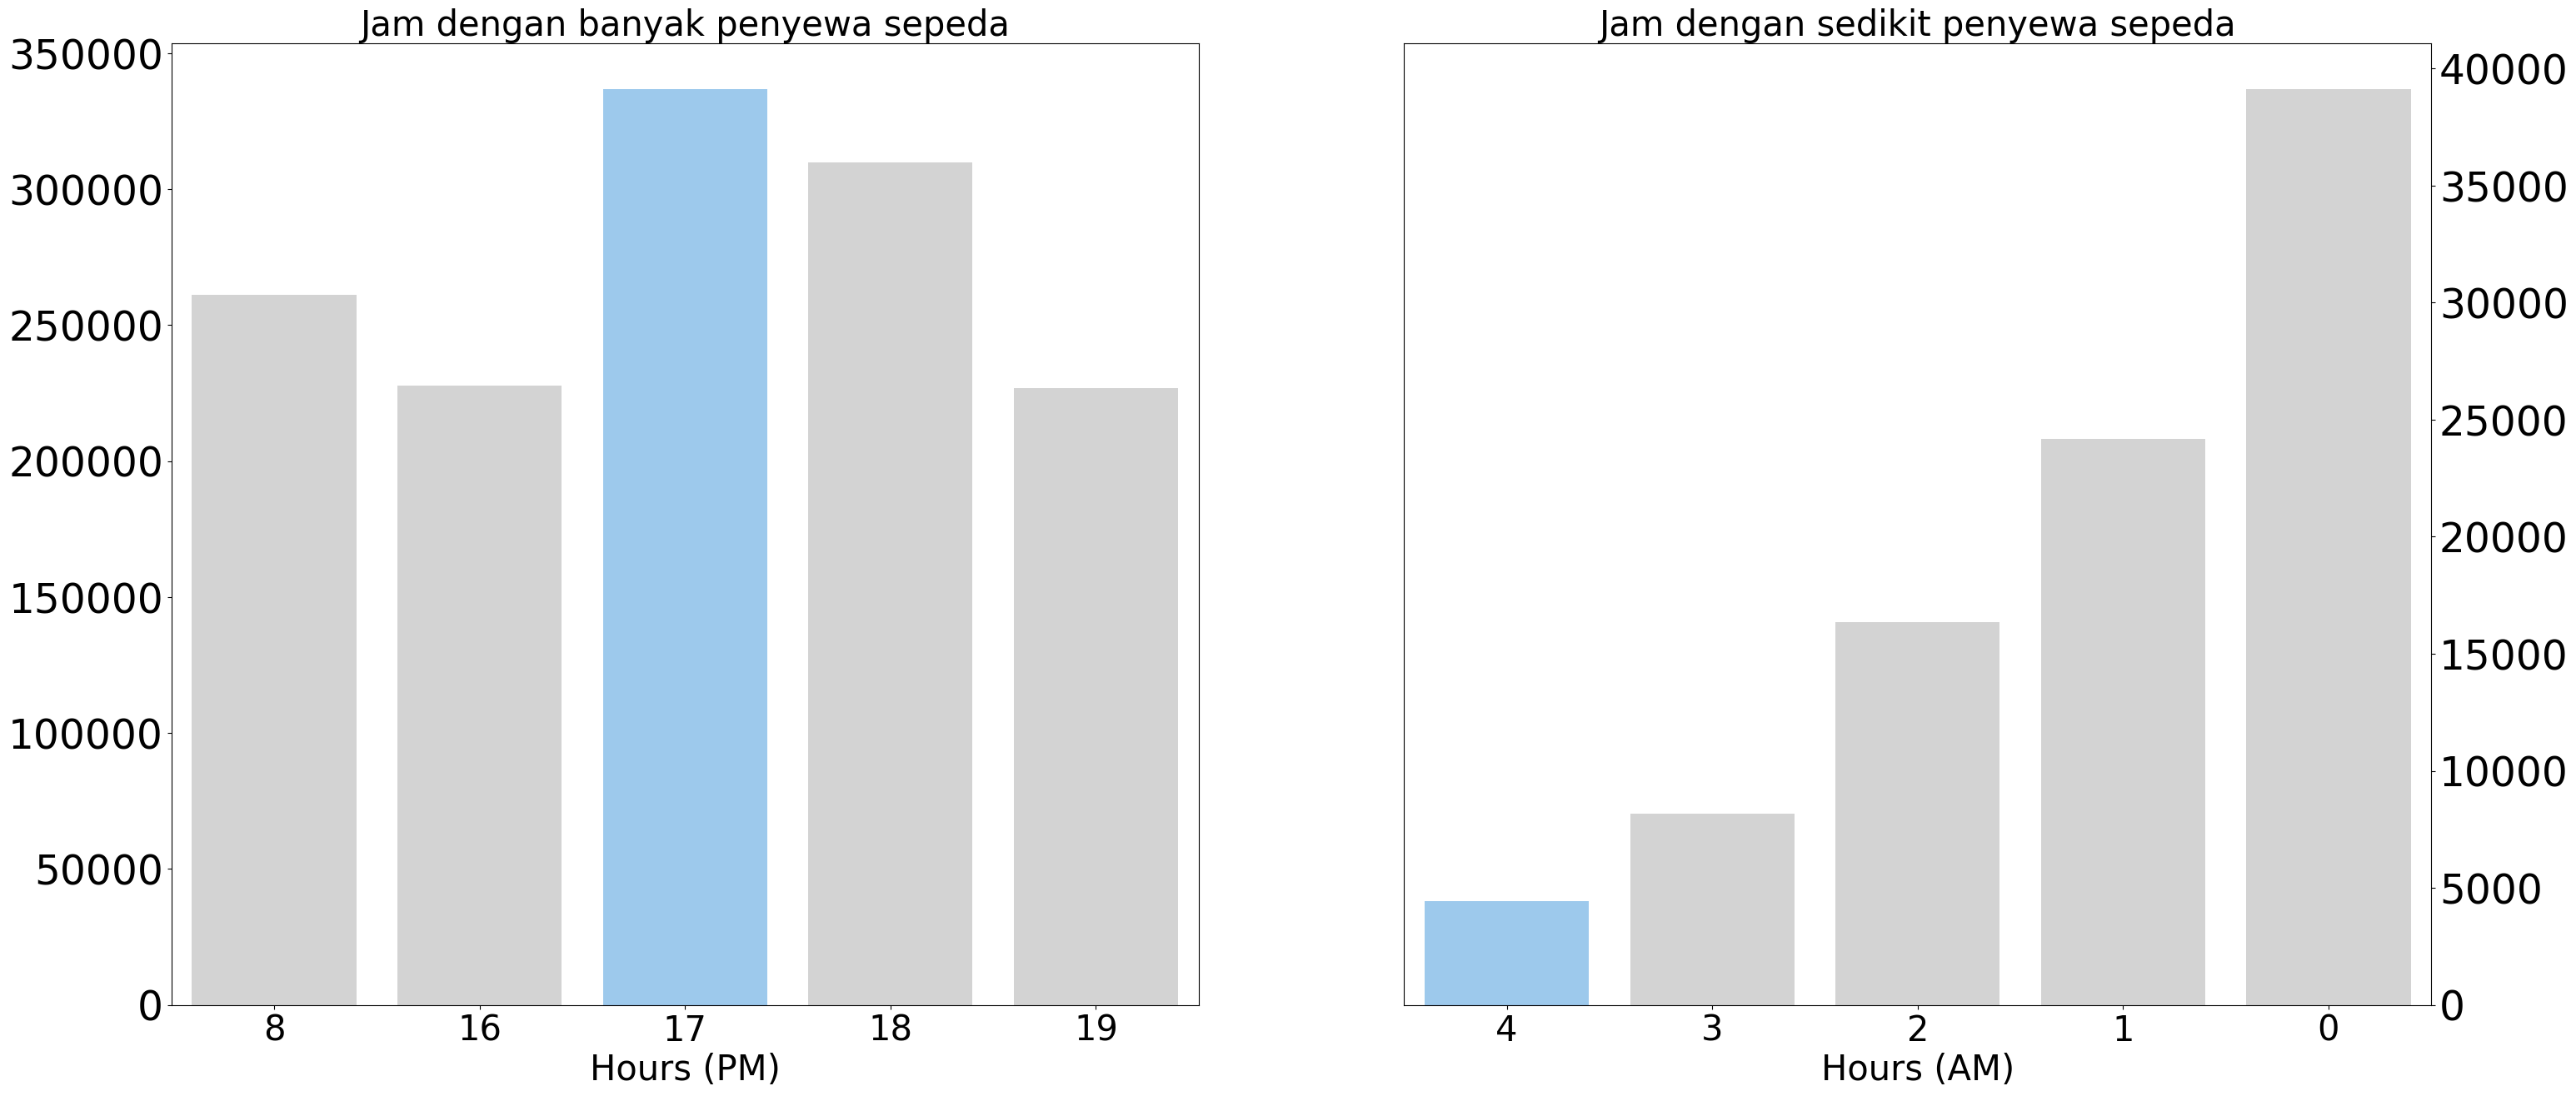

In [26]:
# Mengelompokan data
sum_order_items_df = hour_df.groupby("hour").Total_count.sum().sort_values(ascending=False).reset_index()
# Membuat barplot untuk penyewa sepeda terbanyak
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))
sns.barplot(x="hour", y="Total_count", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])
# Menambahkan judul dan label untuk tabel pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)
# Membuat bar plot untuk penyewa sepeda paling sedikit
sns.barplot(x="hour", y="Total_count", data=sum_order_items_df.sort_values(by="hour", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])
# Menambahkan judul dan label untuk tabel kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)
# Menampilkan plot
plt.show()

*   Dari data diatas kita bisa melihat penyewa terbanyak itu ada pada jam 17.00 dan paling sedikit itu ada pada jam 4.00

### Pertanyaan 3: Berapa banyak perbandingan orang yang registered dan casual ?

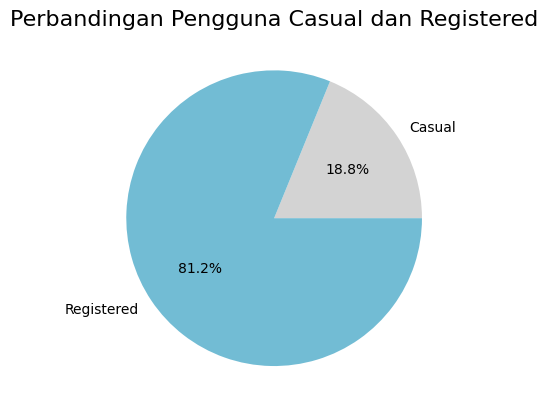

In [27]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])
plt.title('Perbandingan Pengguna Casual dan Registered', fontsize=16)

# Menampilkan pie plot
plt.show()



*   Bisa dilihat dari grafik diatas bahwa yang telah ter registered itu 81.2% dan yang casual adalah 18.8%.



## Analisis Lanjutan (Opsional)



#### ANALISIS CLUSTERING
  


**Total Penyewa Berdasarkan Weathersit**

In [28]:
# Total Pengguna berdasarkan cuaca
# Group by 'weathersit' and sum 'Total_count'
weather_counts = hour_df.groupby('weathersit')['Total_count'].sum().reset_index()

# Display the result
print(weather_counts)

       weathersit  Total_count
0           Clear      2338173
1           Misty       795952
2  Light Rainsnow       158331
3  Heavy Rainsnow          223


<ipython-input-28-b6580f7718eb>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_counts = hour_df.groupby('weathersit')['Total_count'].sum().reset_index()


kita dapat mengidentifikasi kelompok pengguna yang lebih cenderung menyewa sepeda pada hari-hari yang clear

#### RFM ANALISIS


RFM Analysis dibawah ini digunakan untuk memahami perilaku pelanggan dari tiga faktor utama:

Recency (seberapa baru pelanggan berinteraksi dengan bisnis)
Frequency (banyaknya pelanggan dalam berinteraksi)
Monetary (banyaknya uang yang mereka gunakan)

In [32]:
current_date = max(hour_df['date'])
rfm_df = hour_df.groupby('registered').agg({
    'date': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'Total_count': 'sum'  # Monetary
}).reset_index()
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']
print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


## Conclusion

- Pertanyaan 1 : Pada musim apakah penyewaan paling terbanyak ?
  
  Kesimpulan nya bahwa musim terbanyak itu ada pada musim fall(Musim Gugur).
  Musim fall sebanyak 1061129, Musim Summer 918589 ,Winter	841613 ,Spring	471348

- Pertanyaan 2 : Pada Jam berapa penyewaan sepeda paling banyak dan paling sedikit ?
  
  Kesimpulan nya bahwa penyewa terbanyak itu ada pada jam 17.00 dan penyewa paling sedikit itu ada pada jam 4.00
- Pertanyaan 3 : Berapa banyak perbandingan orang yang registered dan casual ?
  
  Kesimpulannya bahwa yang telah ter registered itu adalah 81.2% dan casual itu adalah 18.8%